In [7]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# predictive model libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_recall_fscore_support,roc_auc_score,classification_report, precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression

#loading dataset fetal_health
df=pd.read_csv('fetal_health.csv')
df['fetal_health']=df.fetal_health.astype(int)
df.iloc[:,0:22]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


# EDA (EXPLORATORY DATA ANALYSIS)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [9]:
# The dataset is full, there is no missing data and it is composed mainly int64 and float64 type variables.

# The 'fetal_health' column includes the classes meant for prediction. Therefore, we are dealing with a multiclass problem:

# 1: Normal
# 2: Suspect
# 3: Pathological
    
# Rename the next plot column header for better presentation/user experience 
df.rename(columns={df.columns[9]:'%_time_with_abnormal_long_term_var'},inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
%_time_with_abnormal_long_term_var,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [10]:
# separate features from target fetal health
df_target=df['fetal_health']
df_feature=df.drop('fetal_health',axis=1)

### Class Distribution


Text(0.5, 1.0, 'Class distribution')

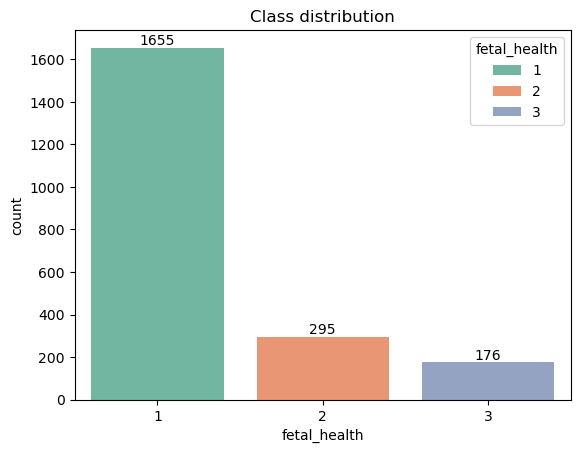

In [20]:
g0=sns.countplot(data=df, x='fetal_health',hue='fetal_health',palette='Set2',dodge=False)
g0.bar_label(g0.containers[0]);
g0.bar_label(g0.containers[1]);
g0.bar_label(g0.containers[2]);
plt.title('Class distribution')

In [ ]:
# Unbalanced classes. This can proof to be a problem later while performing the predictive model calculation.

### Features plot

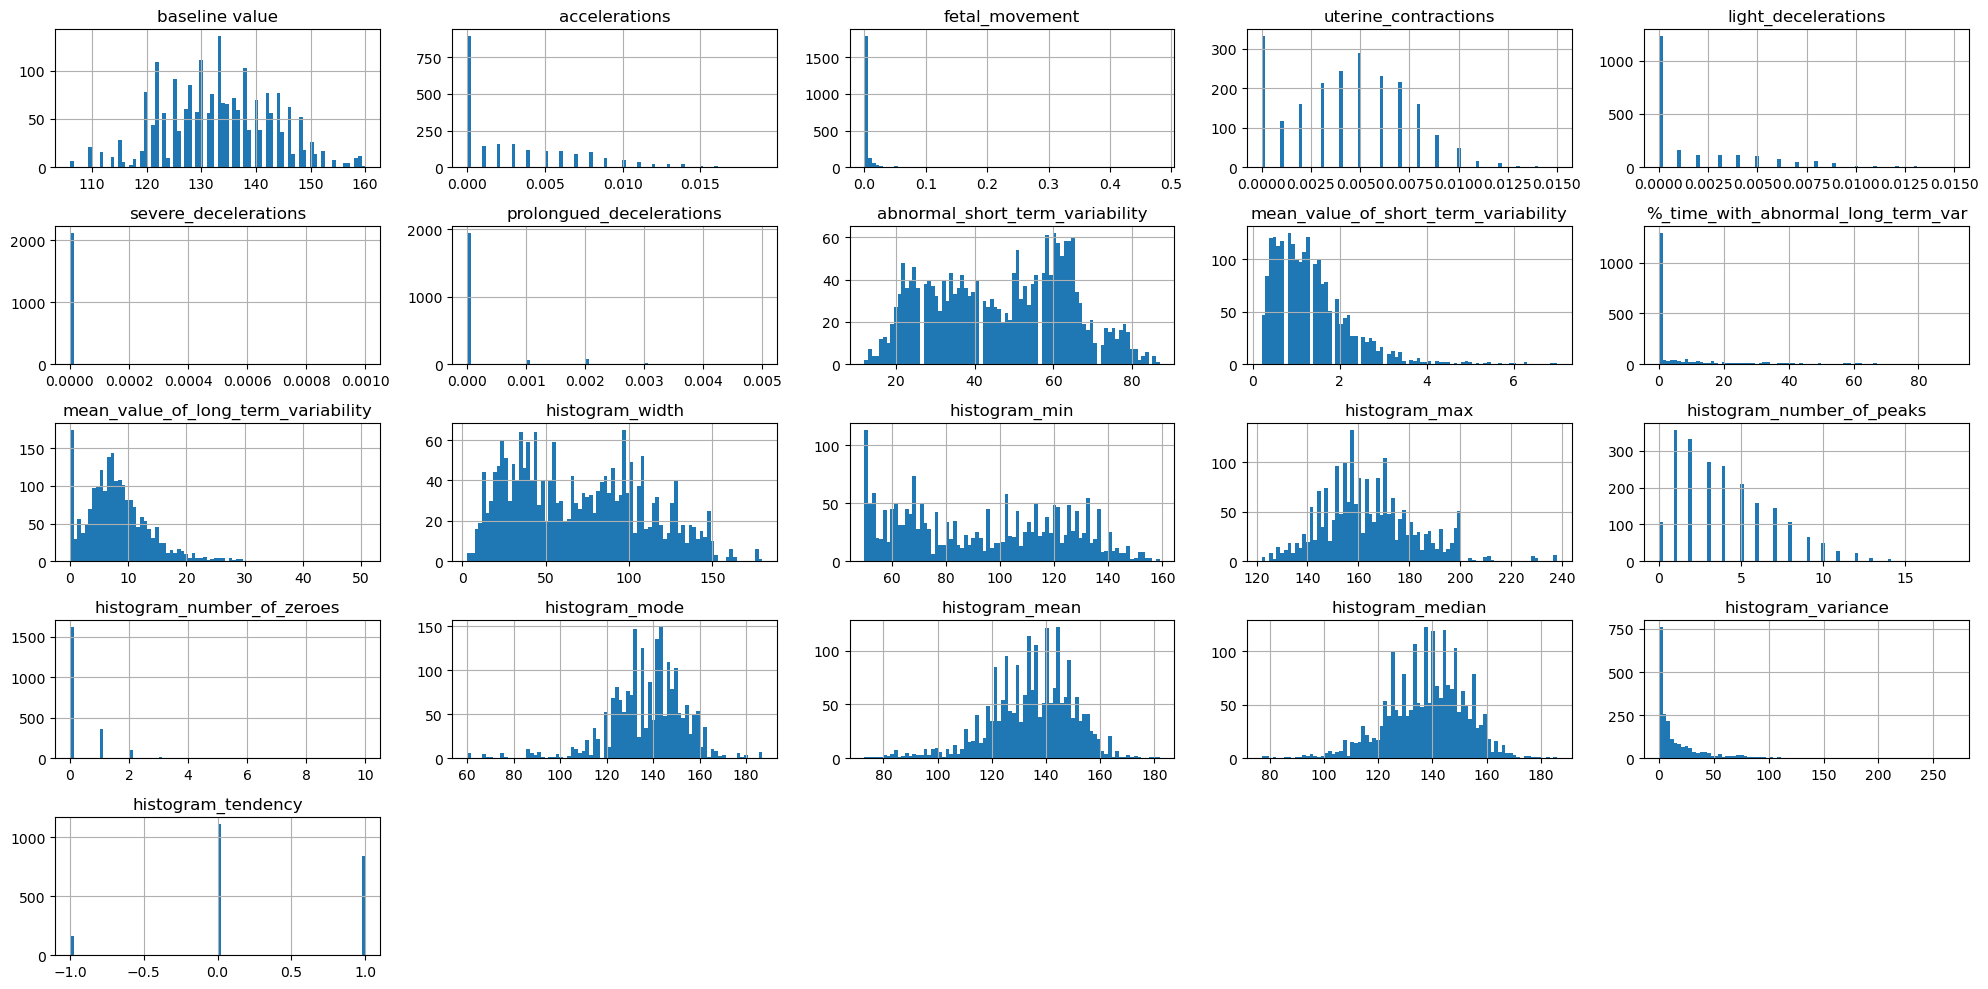

In [25]:
fig,axs=plt.subplots(5,5,figsize=(20,10))
axs=axs.ravel()
for i, col in enumerate(df_feature.columns):
    axs[i].hist(df_feature[col],bins=80)
    axs[i].set_title(col)
    axs[i].grid()
plt.tight_layout()

for i in range(21,25):
    fig.delaxes(axs.flatten()[i])

In [ ]:
# Avarage Values of the features per class

In [26]:
df_mean=pd.pivot_table(df,index=df['fetal_health'].astype(int),aggfunc='mean',sort=True)[df.columns.drop('fetal_health')]
df_mean.T

fetal_health,1,2,3
baseline value,1.319819e+02,141.684746,131.687500
accelerations,3.992145e-03,0.000275,0.000392
fetal_movement,7.963142e-03,0.008332,0.025676
uterine_contractions,4.780665e-03,0.002390,0.003784
light_decelerations,1.941390e-03,0.000536,0.003670
severe_decelerations,6.042296e-07,0.000000,0.000034
prolongued_decelerations,5.135952e-05,0.000095,0.001273
abnormal_short_term_variability,4.246586e+01,61.901695,64.539773
mean_value_of_short_term_variability,1.430634e+00,0.638983,1.575568
%_time_with_abnormal_long_term_var,5.044713e+00,29.030508,22.846591


<Figure size 640x480 with 0 Axes>

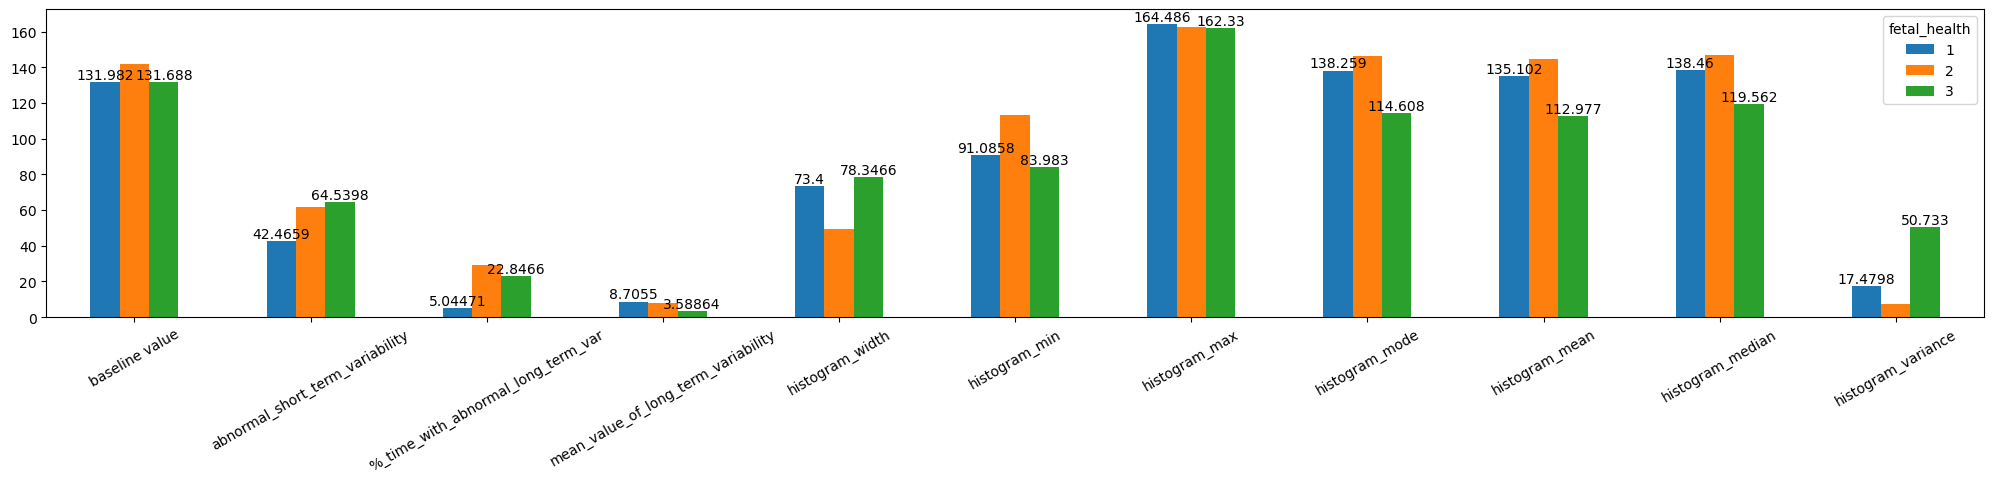

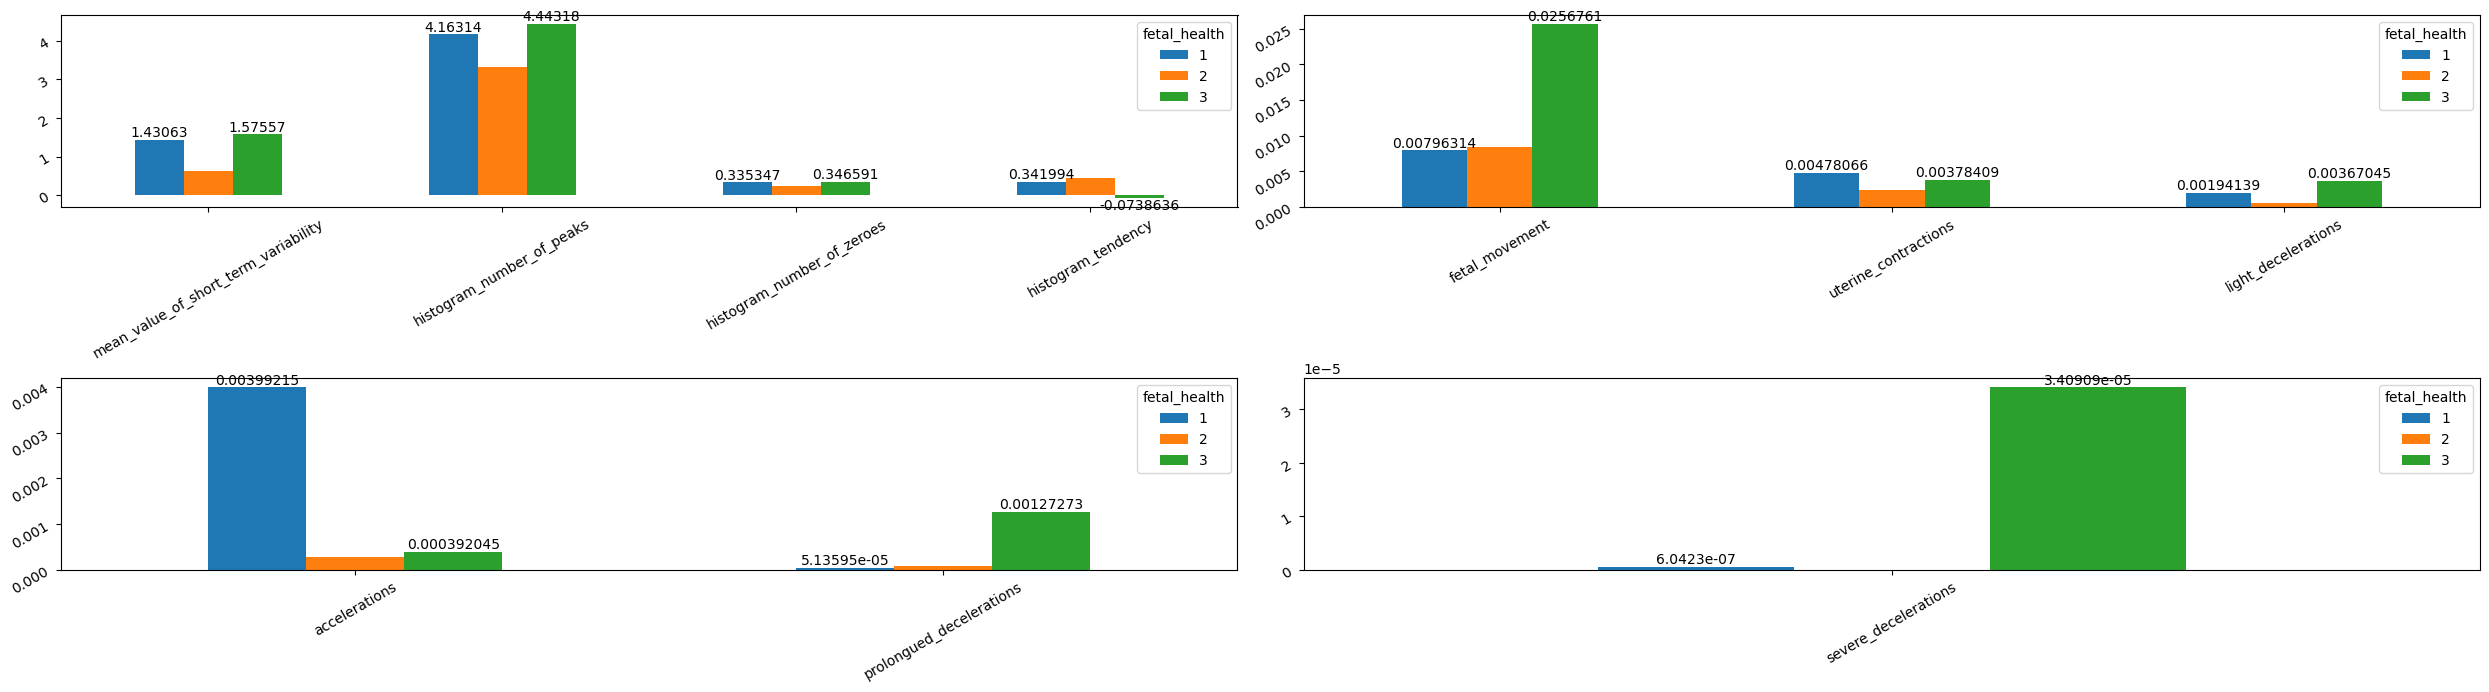

In [28]:
col1=['baseline value', 'abnormal_short_term_variability','%_time_with_abnormal_long_term_var','mean_value_of_long_term_variability','histogram_width','histogram_min', 'histogram_max',  'histogram_mode', 'histogram_mean','histogram_median','histogram_variance']
col2=['mean_value_of_short_term_variability','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_tendency']
col3=['fetal_movement','uterine_contractions','light_decelerations']
col4=['accelerations','prolongued_decelerations']
col5=['severe_decelerations']
plt.figure()
g=df_mean[col1].T.plot(kind='bar',figsize=(25,4))
g.bar_label(g.containers[0],label_type='edge')
g.bar_label(g.containers[2],label_type='edge')
plt.xticks(rotation = 30)

fig,ax=plt.subplots(2,2,figsize=(25,7))
ax=ax.ravel()
g0=df_mean[col2].T.plot(kind='bar',ax=ax[0])
ax[0].tick_params(labelrotation=30)
ax[0].bar_label(ax[0].containers[0],label_type='edge')
ax[0].bar_label(ax[0].containers[2],label_type='edge')
g1=df_mean[col3].T.plot(kind='bar',ax=ax[1])
ax[1].tick_params(labelrotation=30)
ax[1].bar_label(ax[1].containers[0],label_type='edge')
ax[1].bar_label(ax[1].containers[2],label_type='edge')
g2=df_mean[col4].T.plot(kind='bar',ax=ax[2])
ax[2].tick_params(labelrotation=30)
ax[2].bar_label(ax[2].containers[0],label_type='edge')
ax[2].bar_label(ax[2].containers[2],label_type='edge')
g3=df_mean[col5].T.plot(kind='bar',ax=ax[3])
ax[3].tick_params(labelrotation=30)
ax[3].bar_label(ax[3].containers[0],label_type='edge')
ax[3].bar_label(ax[3].containers[2],label_type='edge')
plt.tight_layout()

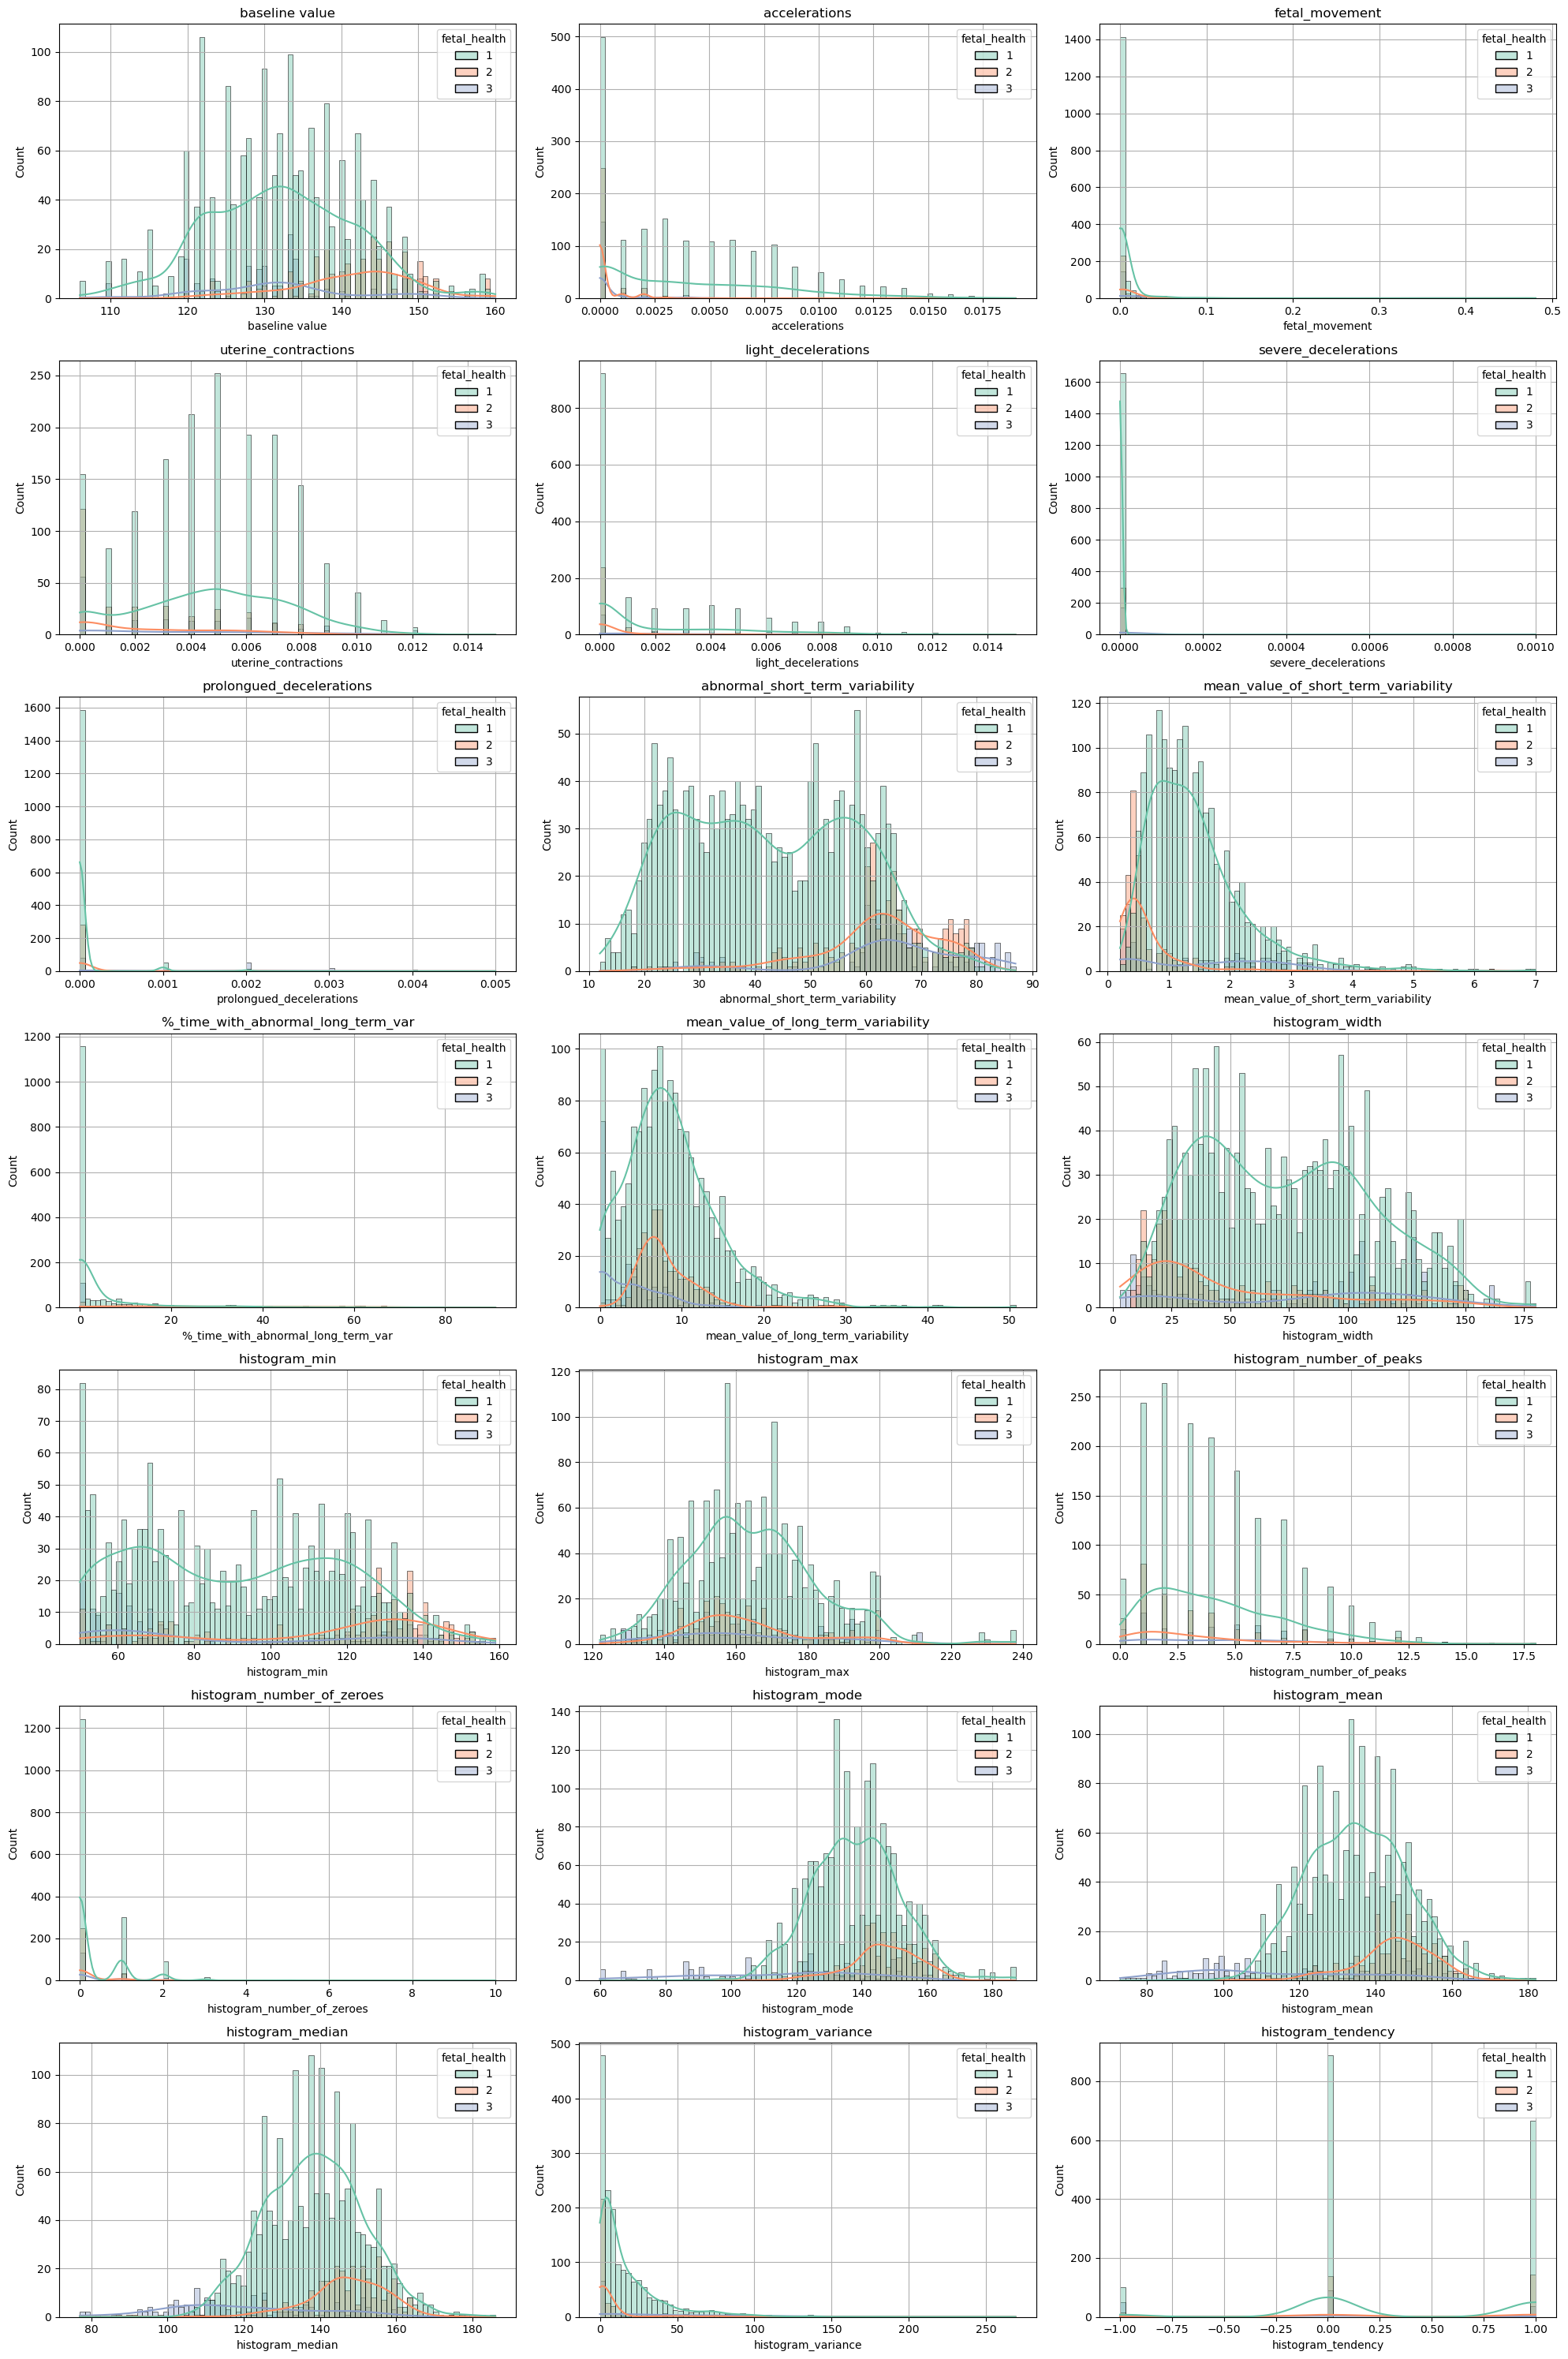

In [33]:
fig,ax=plt.subplots(7,3,figsize=(20,30))
ax=ax.ravel()
for i, col in enumerate(df_feature.columns):
    sns.histplot(data=df,x=col,hue='fetal_health',kde=True,bins=80,ax=ax[i],palette='Set2',alpha=0.4)
    ax[i].set_title(col)
    ax[i].grid()
plt.tight_layout()

In this case abnormal_short_term_variability shows us better how average values ​​for example close to 60 could be attributed at the same time to ***pathological*** ,to ***suspects***, and to ***normal***. On the contrary, it can be seen that in this neighborhood the occurrence of normals is higher than pathologicals and suspects, while it could be said that if the expected value were 40 then this would be classified with more probability as ***normal*** , because it is more distant and separated from the higher frequency field of the other classes. This ambiguity could also be due to the fact that the classes are not well balanced

The same result can be observed in terms of density in the graphs below:

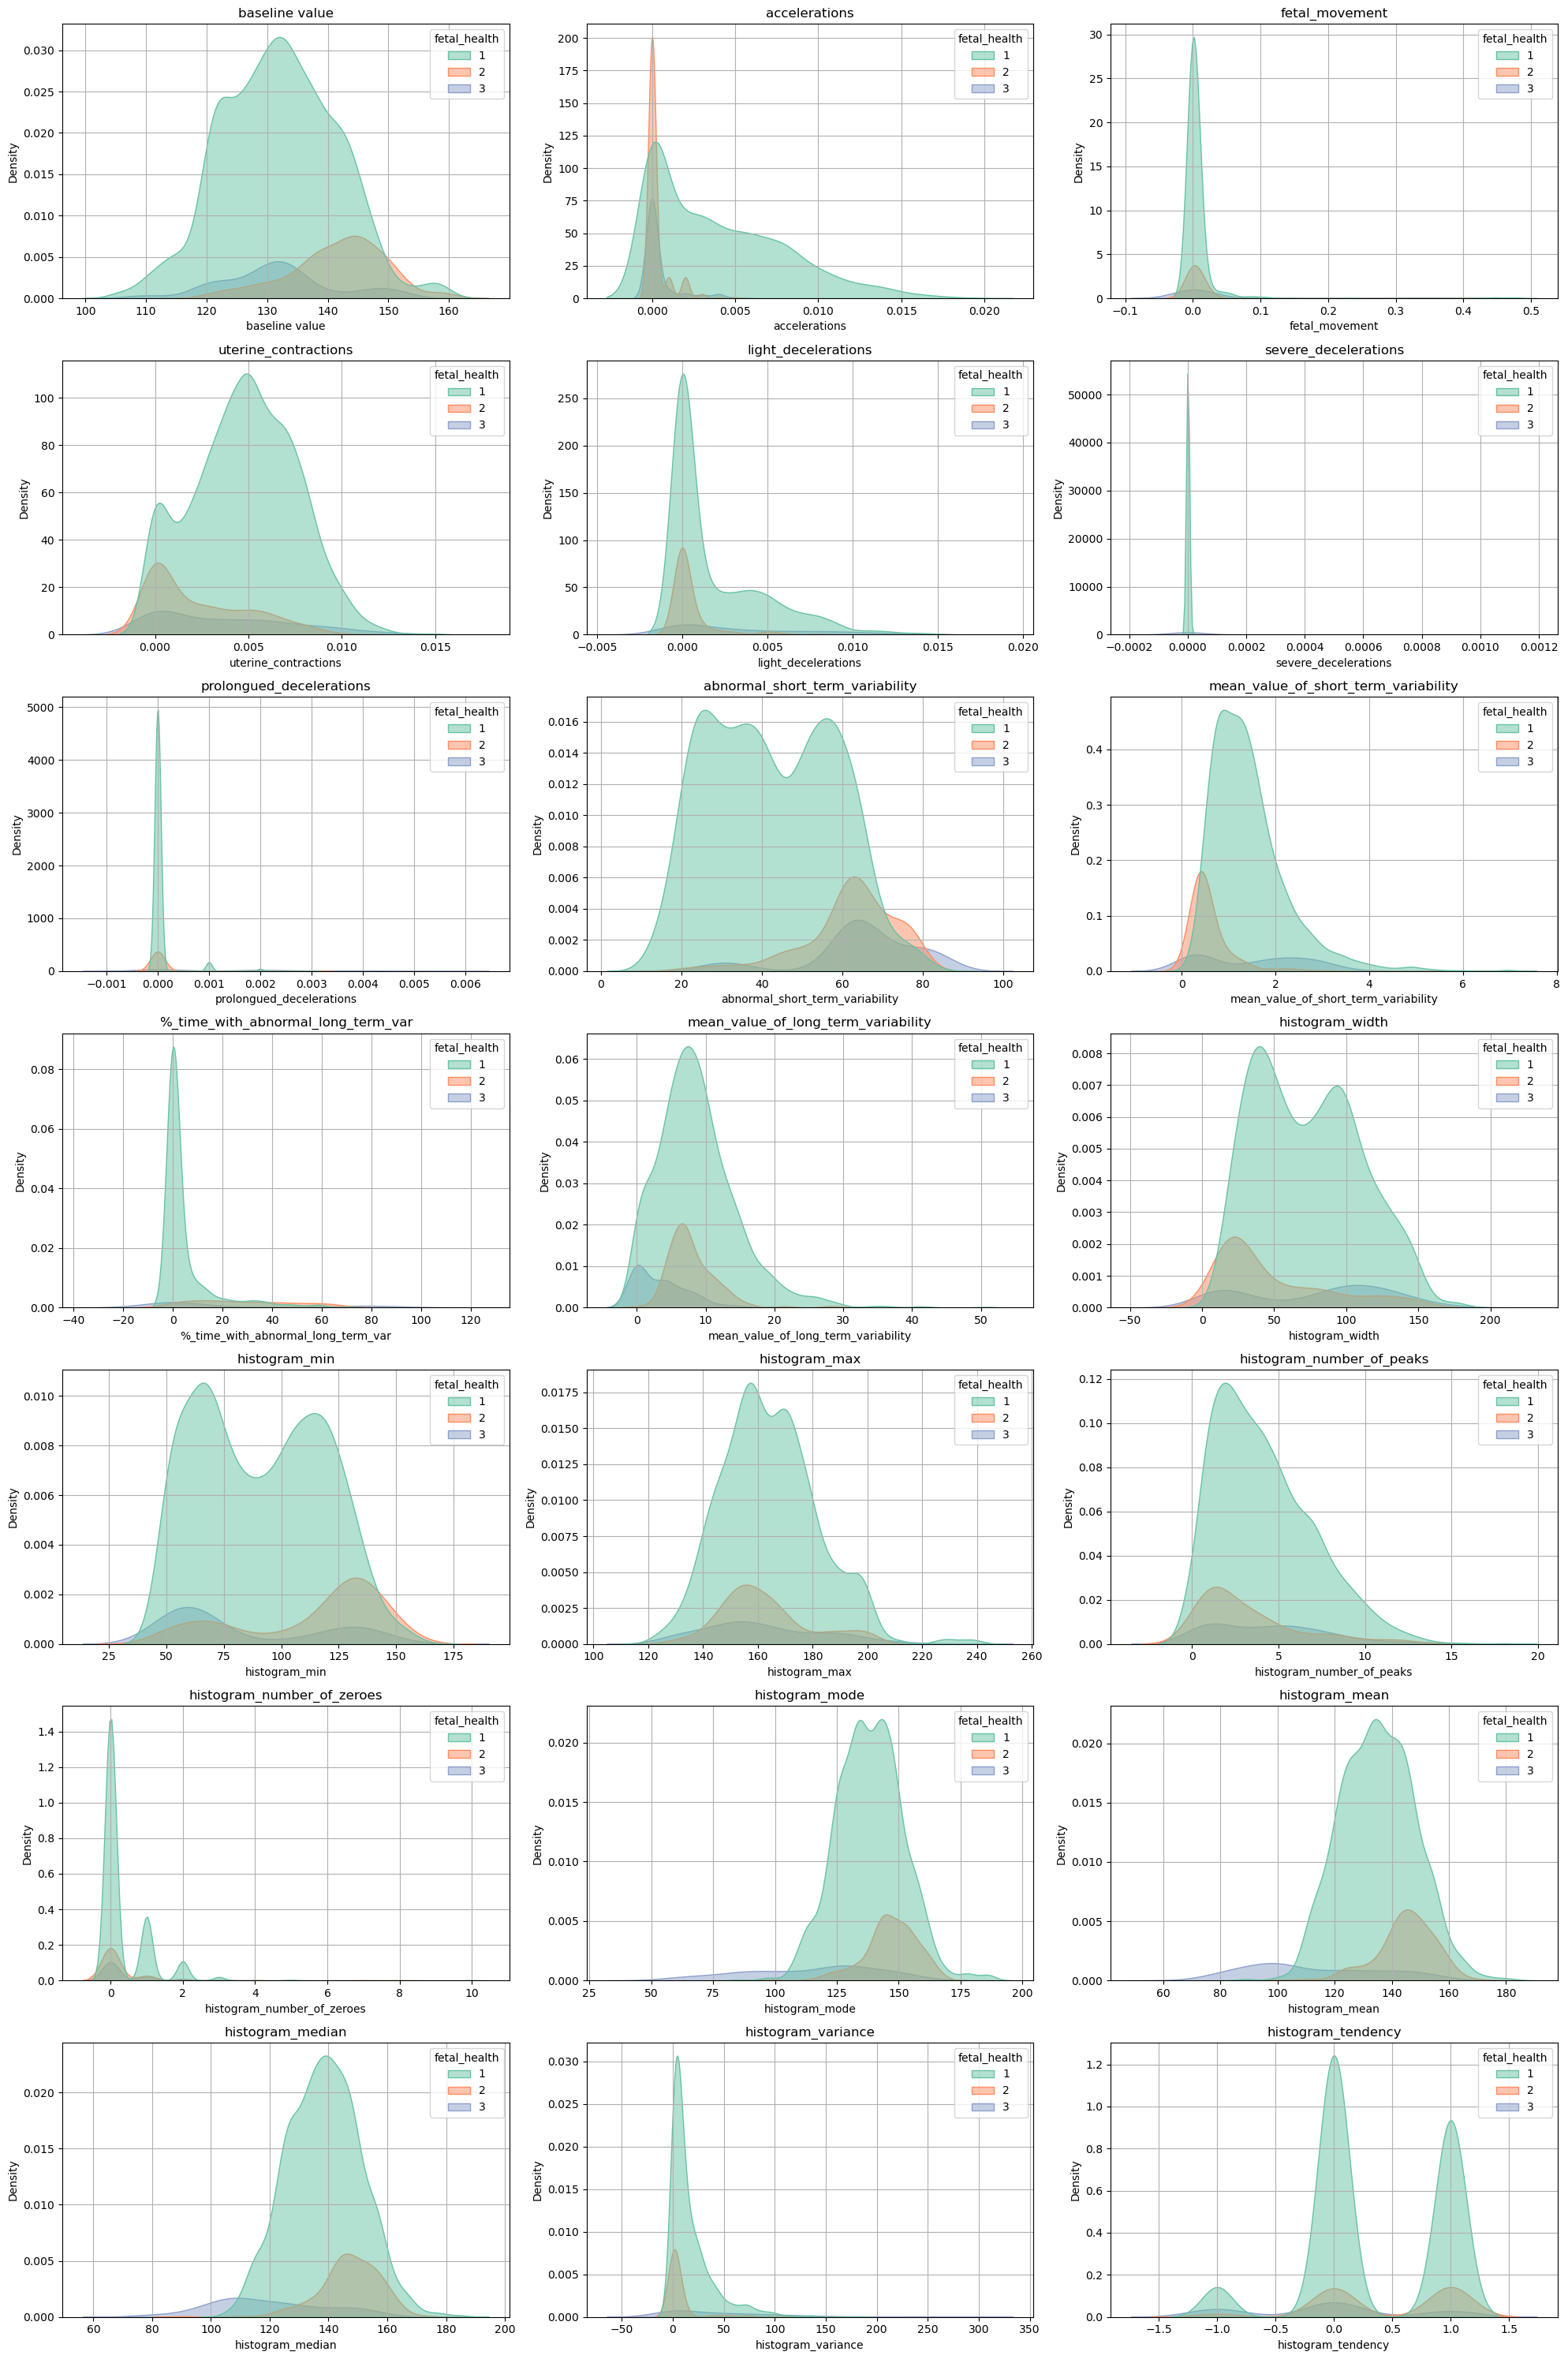

In [31]:
fig,ax=plt.subplots(7,3,figsize=(20,30))
ax=ax.ravel()
for i, feature in enumerate(df_feature.columns):
    sns.kdeplot(data=df,x=feature,hue='fetal_health',ax=ax[i],palette='Set2',fill=True,alpha=0.5,warn_singular=False)
    ax[i].set_title(feature)
    ax[i].grid()
plt.tight_layout()

### Outliers

<AxesSubplot:>

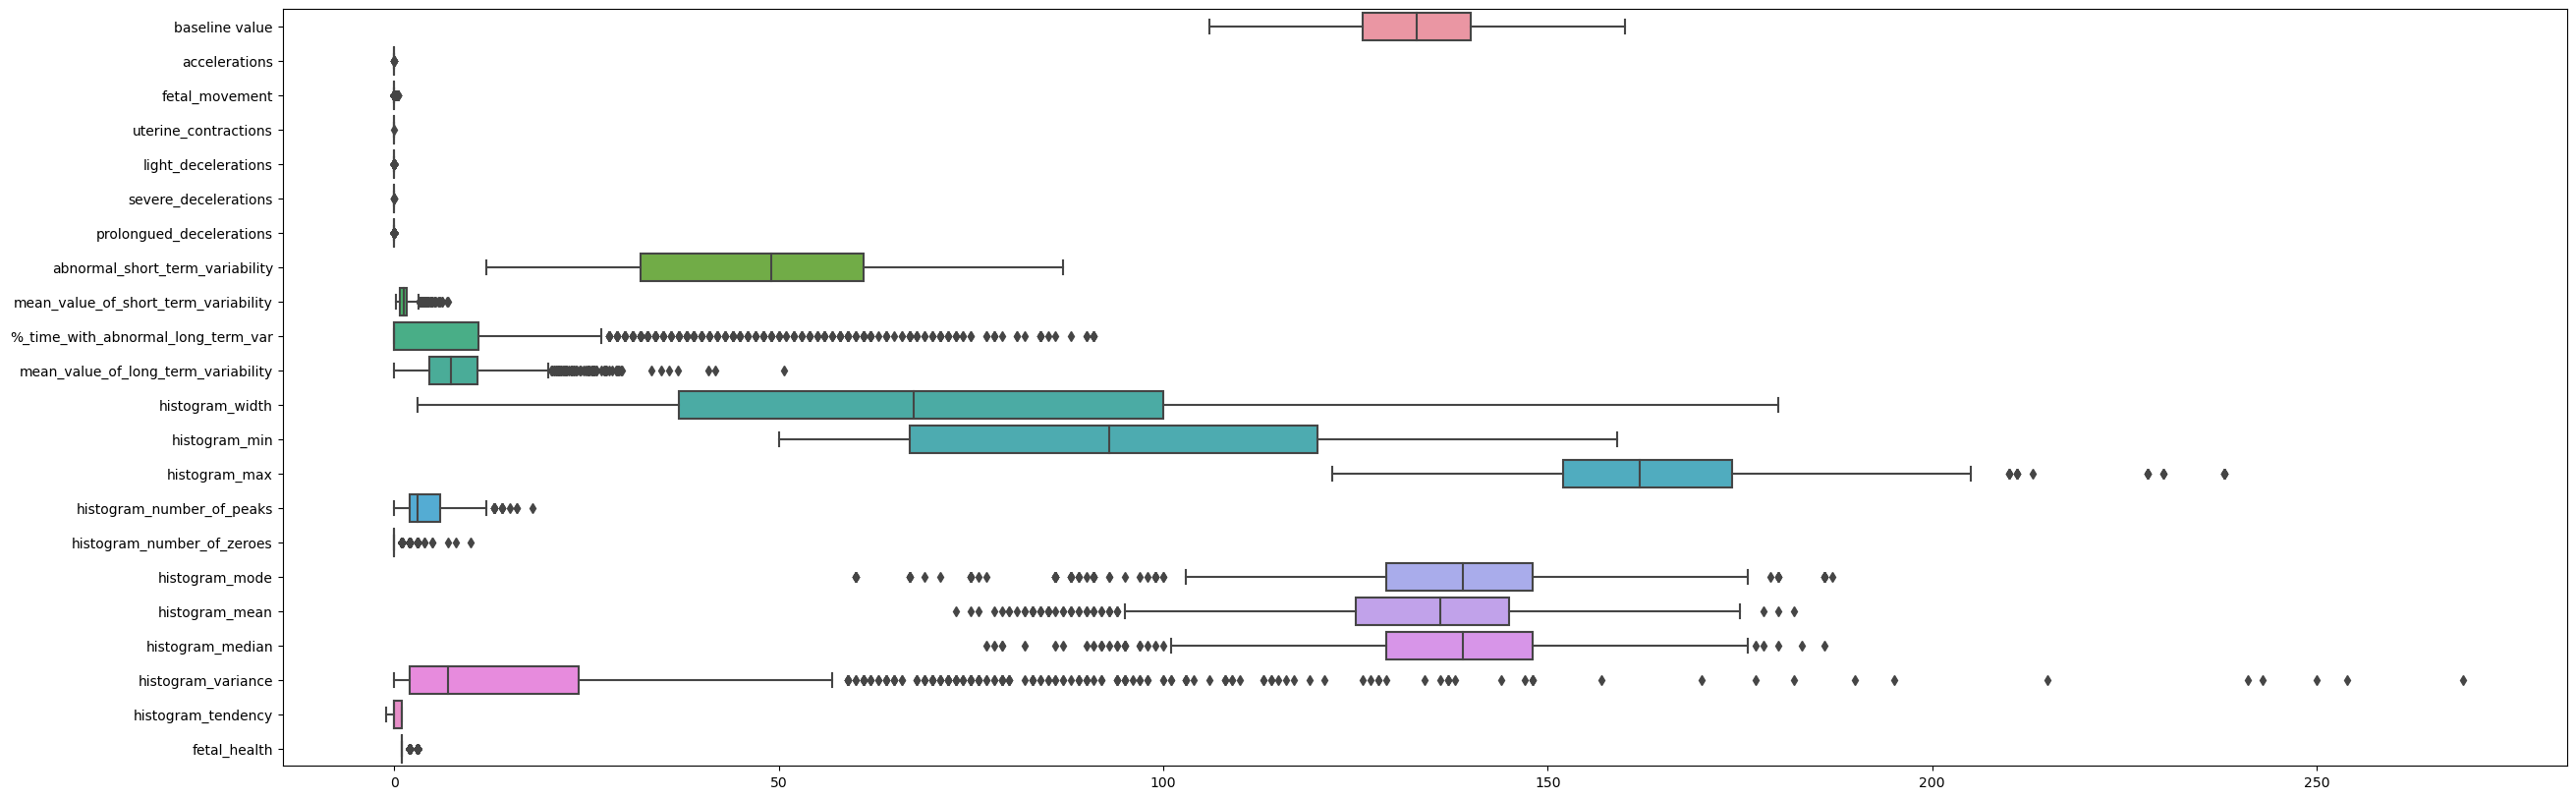

In [34]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(ax=ax, data=df,orient='h')

Outliers are very numerous and scattered within the dataset. Brutally eliminating them would mean not only significantly reducing the dataset but almost certainly depriving oneself of the information necessary to identify suspicious or pathological cases.

Given the nature of the problem, it is very probable, in fact, that these points are actually genuine data and for this reason they will be kept in full

### Correlation Matrix

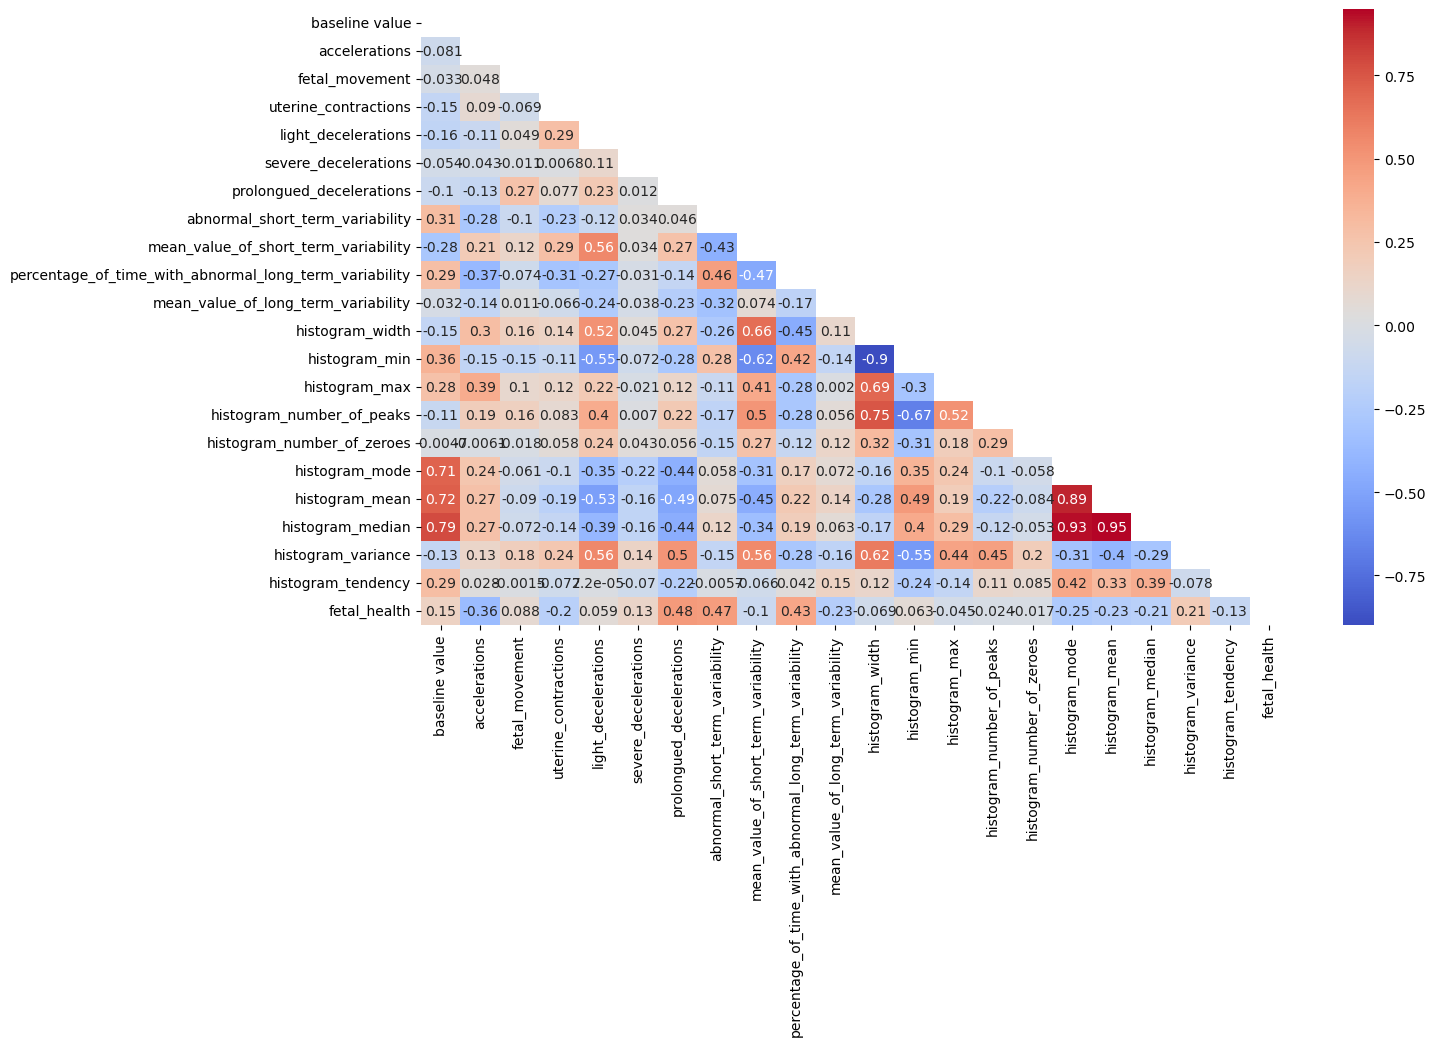

In [10]:
plt.figure(figsize=(14, 8))

# Filter numeric columns
numeric_columns = df.select_dtypes(include=np.number)

# Generate a mask to display only the upper triangle
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))

# Visualize the heatmap
sns.heatmap(numeric_columns.corr(), cbar=True, annot=True, cmap="coolwarm", mask=mask)

# Show the plot
plt.show()

The feature "fetal_health" exhibits strong correlations with the following variables:
- prolongued_decelerations
- abnormal_short_term_variability
- accelerations
- %_time_with_abnormal_long_term_variability
- mean_value_of_long_term_variability
- histogram_mode
- histogram_mean
- histogram_median
- histogram_variance

These variables are closely associated with the "fetal_health" feature

Although some features exhibit strong correlations with others, which suggests they may not provide significant independent contributions to the predictive analysis, it was decided to retain all the features. The computational cost of the problem is not particularly burdensome, and dropping the correlated features would not significantly lighten the calculation load.

# Pre-Process